# ML4VA : Crop Yield Prediction

##### Team ACA
##### CS 4501 Machine Learning
##### Spring 2019

In [1]:
# Read Data
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import pandas as pd
raw_data = pd.read_csv("data_10_states_temp_precip.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
State            1234 non-null object
Month            1234 non-null object
Year             1234 non-null int64
Crop Yield       1234 non-null float64
Temperature      1234 non-null float64
Precipitation    1234 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 57.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c2f9198>,
      dtype=object)

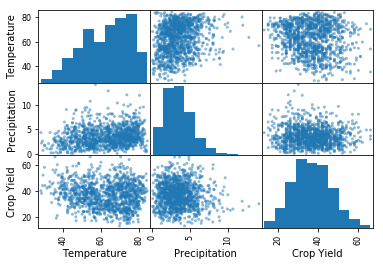

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["Temperature", "Precipitation", "Crop Yield"]
scatter_matrix(raw_data[attributes])

In [3]:
# split into test and training data
from sklearn.model_selection import train_test_split

raw_train_set, raw_test_set = train_test_split(raw_data, test_size = 0.2)

In [56]:
# data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

num_attribs = ["Temperature", "Precipitation"]
cat_attribs = ["Month"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(raw_train_set)
Y_train = raw_train_set["Crop Yield"].values

X_test = full_pipeline.fit_transform(raw_test_set)
Y_test = raw_test_set["Crop Yield"].values


In [57]:
def display_scores(scores):
    print("Scores: ", scores)
    print("mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

## Training Different Models

### Linear Regression Model

In [58]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Linear Regression Performance through cross validation
lin_scores = cross_val_score(lin_reg, X_train, Y_train, scoring="neg_mean_squared_error",cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [8.30497243 8.58715482 7.62348717 8.10972417 8.0837218 ]
mean:  8.141812076799884
Standard deviation:  0.3155998355747856


In [59]:
lin_reg_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(Y_test, lin_reg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8.923198752988187

### Decision Tree Model

In [7]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [60]:
tree_scores = cross_val_score(tree_reg, X_train, Y_train, scoring="neg_mean_squared_error",cv =5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores:  [10.66560127 11.54356045 11.41671453 11.1382635  10.65262533]
mean:  11.083353014717598
Standard deviation:  0.3703994599047048


In [61]:
tree_reg_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(Y_test, tree_reg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

11.583397654167577

### Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)
forest_reg.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
for_scores = cross_val_score(forest_reg, X_train, Y_train, scoring="neg_mean_squared_error",cv=10)
for_rmse_scores = np.sqrt(-for_scores)
display_scores(for_rmse_scores)

Scores:  [8.7319988  9.60355837 9.75488482 8.50137986 9.20302676 8.78739082
 9.45264999 8.45348769 8.60163748 7.9672393 ]
mean:  8.905725388799699
Standard deviation:  0.5459836136592081


In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[2,3,10,30,50,80,90,100],'max_features':[1,2]},
    {'bootstrap':[False],'n_estimators':[2,3,10,30,50,80,90,100], 'max_features':[1, 2]},
]


for_reg = RandomForestRegressor(random_state = 42)
grid_search_forest = GridSearchCV(for_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, Y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [2, 3, 10, 30, 50, 80, 90, 100], 'max_features': [1, 2]}, {'bootstrap': [False], 'n_estimators': [2, 3, 10, 30, 50, 80, 90, 100], 'max_features': [1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [66]:
print(grid_search_forest.best_params_)
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

{'max_features': 1, 'n_estimators': 100}
9.940224714556836 {'max_features': 1, 'n_estimators': 2}
9.450903189158572 {'max_features': 1, 'n_estimators': 3}
8.761899832513333 {'max_features': 1, 'n_estimators': 10}
8.597080042242828 {'max_features': 1, 'n_estimators': 30}
8.540168057431458 {'max_features': 1, 'n_estimators': 50}
8.508364222419775 {'max_features': 1, 'n_estimators': 80}
8.504831240386084 {'max_features': 1, 'n_estimators': 90}
8.503943051110229 {'max_features': 1, 'n_estimators': 100}
9.81731561665 {'max_features': 2, 'n_estimators': 2}
9.38818793608112 {'max_features': 2, 'n_estimators': 3}
8.755653785254976 {'max_features': 2, 'n_estimators': 10}
8.601995051439989 {'max_features': 2, 'n_estimators': 30}
8.559508967894923 {'max_features': 2, 'n_estimators': 50}
8.554904633992797 {'max_features': 2, 'n_estimators': 80}
8.559792931088898 {'max_features': 2, 'n_estimators': 90}
8.557459626182474 {'max_features': 2, 'n_estimators': 100}
10.242160369643083 {'bootstrap': False

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
        'n_estimators': randint(low=1, high = 200),
        'max_features': randint(low=1, high = 3),
        #'mean_sample_split': randint(low=1, high = )
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, Y_train)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.499575124266325 {'max_features': 1, 'n_estimators': 180}
8.723995378161018 {'max_features': 1, 'n_estimators': 15}
8.527204748434766 {'max_features': 1, 'n_estimators': 72}
8.66293304840025 {'max_features': 1, 'n_estimators': 21}
8.501117076687718 {'max_features': 1, 'n_estimators': 122}
8.517224924614585 {'max_features': 1, 'n_estimators': 75}
8.50111867643771 {'max_features': 1, 'n_estimators': 88}
8.503943051110229 {'max_features': 1, 'n_estimators': 100}
8.505223935437481 {'max_features': 2, 'n_estimators': 152}
8.510647681079734 {'max_features': 1, 'n_estimators': 150}
9.940224714556836 {'max_features': 1, 'n_estimators': 2}
8.5005296674969 {'max_features': 2, 'n_estimators': 158}
8.520626382927263 {'max_features': 2, 'n_estimators': 130}
8.496482873211962 {'max_features': 2, 'n_estimators': 188}
8.504551513388742 {'max_features': 1, 'n_estimators': 161}
8.562767092611743 {'max_features': 2, 'n_estimators': 58}
8.560704724043754 {'max_features': 2, 'n_estimators': 89}
8.55005393

In [45]:
forest_final = rnd_search.best_estimator_
forest_reg_predictions = forest_final.predict(X_test)
forest_mse = mean_squared_error(Y_test, forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

9.12973675604953

### Linear SVM

In [11]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, Y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
        print(np.sqrt(-mean_score),params)
    grid_search.best_params_
    
    return grid_search.best_params_

In [12]:
svm_reg_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(Y_test, svm_reg_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

9.010404494008096

### Polynomial SVM

In [13]:
svm_poly_reg = SVR(kernel='poly',degree = 2, C=120,epsilon = 0.3, gamma = 'auto')
svm_poly_reg.fit(X_train, Y_train)

poly_reg_predictions = svm_poly_reg.predict(X_test)
poly_mse = mean_squared_error(Y_test, poly_reg_predictions)
poly_rmse = np.sqrt(poly_mse)
poly_rmse


8.878031367620773

### Neural Network with Tensorflow

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.constraints import maxnorm
from keras import optimizers


nn_model = Sequential()
layer1 = 500
layer2 = 500
layer3 = 500

#nn_model.add(Dropout(0.2, input_shape=(X_train.shape[1],)))
nn_model.add(Dense(layer1, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu', kernel_constraint=maxnorm(3)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(layer2, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(layer3, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

optimizer = optimizers.adam(lr=0.01)
nn_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
nn_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               3500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)  

In [15]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [16]:
nn_model.fit(X_train, Y_train, epochs=500, batch_size=8, validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 789 samples, validate on 198 samples
Epoch 1/500
789/789 [==============================] - 4s 5ms/step - loss: 197.1804 - mean_squared_error: 197.1804 - val_loss: 85.1281 - val_mean_squared_error: 85.1281

Epoch 00001: val_loss improved from inf to 85.12809, saving model to Weights-001--85.12809.hdf5
Epoch 2/500
789/789 [==============================] - 2s 2ms/step - loss: 112.3546 - mean_squared_error: 112.3546 - val_loss: 90.7157 - val_mean_squared_error: 90.7157

Epoch 00002: val_loss did not improve from 85.12809
Epoch 3/500
789/789 [==============================] - 2s 2ms/step - loss: 124.2805 - mean_squared_error: 124.2805 - val_loss: 110.6625 - val_mean_squared_error: 110.6625

Epoch 00003: val_loss did not improve from 85.12809
Epoch 4/500
789/789 [==============================] - 2s 2ms/step - loss: 103.7780 - mean_squared_error: 103.7780 - val_loss: 81.9007 - val_mean_squared_error: 81.9007

Epoch 00004: val_loss im


Epoch 00035: val_loss did not improve from 62.53005
Epoch 36/500
789/789 [==============================] - 2s 2ms/step - loss: 79.8861 - mean_squared_error: 79.8861 - val_loss: 65.8999 - val_mean_squared_error: 65.8999

Epoch 00036: val_loss did not improve from 62.53005
Epoch 37/500
789/789 [==============================] - 2s 2ms/step - loss: 81.0615 - mean_squared_error: 81.0615 - val_loss: 66.6520 - val_mean_squared_error: 66.6520

Epoch 00037: val_loss did not improve from 62.53005
Epoch 38/500
789/789 [==============================] - 2s 2ms/step - loss: 81.5537 - mean_squared_error: 81.5537 - val_loss: 63.6867 - val_mean_squared_error: 63.6867

Epoch 00038: val_loss did not improve from 62.53005
Epoch 39/500
789/789 [==============================] - 2s 2ms/step - loss: 77.3062 - mean_squared_error: 77.3062 - val_loss: 73.9658 - val_mean_squared_error: 73.9658

Epoch 00039: val_loss did not improve from 62.53005
Epoch 40/500
789/789 [==============================] - 2s 2ms/


Epoch 00072: val_loss did not improve from 60.11669
Epoch 73/500
789/789 [==============================] - 2s 2ms/step - loss: 71.8248 - mean_squared_error: 71.8248 - val_loss: 62.1069 - val_mean_squared_error: 62.1069

Epoch 00073: val_loss did not improve from 60.11669
Epoch 74/500
789/789 [==============================] - 2s 2ms/step - loss: 71.0868 - mean_squared_error: 71.0868 - val_loss: 69.8104 - val_mean_squared_error: 69.8104

Epoch 00074: val_loss did not improve from 60.11669
Epoch 75/500
789/789 [==============================] - 2s 2ms/step - loss: 72.0963 - mean_squared_error: 72.0963 - val_loss: 66.4654 - val_mean_squared_error: 66.4654

Epoch 00075: val_loss did not improve from 60.11669
Epoch 76/500
789/789 [==============================] - 2s 2ms/step - loss: 75.4728 - mean_squared_error: 75.4728 - val_loss: 61.6237 - val_mean_squared_error: 61.6237

Epoch 00076: val_loss did not improve from 60.11669
Epoch 77/500
789/789 [==============================] - 2s 2ms/


Epoch 00109: val_loss did not improve from 60.06376
Epoch 110/500
789/789 [==============================] - 2s 2ms/step - loss: 68.6556 - mean_squared_error: 68.6556 - val_loss: 65.1424 - val_mean_squared_error: 65.1424

Epoch 00110: val_loss did not improve from 60.06376
Epoch 111/500
789/789 [==============================] - 2s 2ms/step - loss: 70.8559 - mean_squared_error: 70.8559 - val_loss: 64.1023 - val_mean_squared_error: 64.1023

Epoch 00111: val_loss did not improve from 60.06376
Epoch 112/500
789/789 [==============================] - 2s 2ms/step - loss: 70.6384 - mean_squared_error: 70.6384 - val_loss: 63.7000 - val_mean_squared_error: 63.7000

Epoch 00112: val_loss did not improve from 60.06376
Epoch 113/500
789/789 [==============================] - 2s 2ms/step - loss: 69.9332 - mean_squared_error: 69.9332 - val_loss: 73.1599 - val_mean_squared_error: 73.1599

Epoch 00113: val_loss did not improve from 60.06376
Epoch 114/500
789/789 [==============================] - 2s

789/789 [==============================] - 2s 2ms/step - loss: 70.2184 - mean_squared_error: 70.2184 - val_loss: 64.4468 - val_mean_squared_error: 64.4468

Epoch 00146: val_loss did not improve from 59.53922
Epoch 147/500
789/789 [==============================] - 2s 2ms/step - loss: 65.8738 - mean_squared_error: 65.8738 - val_loss: 71.1921 - val_mean_squared_error: 71.1921

Epoch 00147: val_loss did not improve from 59.53922
Epoch 148/500
789/789 [==============================] - 2s 2ms/step - loss: 68.9798 - mean_squared_error: 68.9798 - val_loss: 64.0747 - val_mean_squared_error: 64.0747

Epoch 00148: val_loss did not improve from 59.53922
Epoch 149/500
789/789 [==============================] - 2s 3ms/step - loss: 65.0937 - mean_squared_error: 65.0937 - val_loss: 68.8795 - val_mean_squared_error: 68.8795

Epoch 00149: val_loss did not improve from 59.53922
Epoch 150/500
789/789 [==============================] - 2s 2ms/step - loss: 68.2146 - mean_squared_error: 68.2146 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 69.6816 - mean_squared_error: 69.6816 - val_loss: 60.9405 - val_mean_squared_error: 60.9405

Epoch 00183: val_loss did not improve from 59.53922
Epoch 184/500
789/789 [==============================] - 2s 2ms/step - loss: 65.9420 - mean_squared_error: 65.9420 - val_loss: 60.5746 - val_mean_squared_error: 60.5746

Epoch 00184: val_loss did not improve from 59.53922
Epoch 185/500
789/789 [==============================] - 2s 2ms/step - loss: 69.0635 - mean_squared_error: 69.0635 - val_loss: 63.4282 - val_mean_squared_error: 63.4282

Epoch 00185: val_loss did not improve from 59.53922
Epoch 186/500
789/789 [==============================] - 2s 2ms/step - loss: 66.9305 - mean_squared_error: 66.9305 - val_loss: 63.9431 - val_mean_squared_error: 63.9431

Epoch 00186: val_loss did not improve from 59.53922
Epoch 187/500
789/789 [==============================] - 2s 2ms/step - loss: 69.4747 - mean_squared_error: 69.4747 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 66.7679 - mean_squared_error: 66.7679 - val_loss: 65.4839 - val_mean_squared_error: 65.4839

Epoch 00220: val_loss did not improve from 59.53922
Epoch 221/500
789/789 [==============================] - 2s 2ms/step - loss: 69.5505 - mean_squared_error: 69.5505 - val_loss: 62.5009 - val_mean_squared_error: 62.5009

Epoch 00221: val_loss did not improve from 59.53922
Epoch 222/500
789/789 [==============================] - 2s 2ms/step - loss: 66.2428 - mean_squared_error: 66.2428 - val_loss: 59.5760 - val_mean_squared_error: 59.5760

Epoch 00222: val_loss did not improve from 59.53922
Epoch 223/500
789/789 [==============================] - 2s 2ms/step - loss: 69.0043 - mean_squared_error: 69.0043 - val_loss: 69.4033 - val_mean_squared_error: 69.4033

Epoch 00223: val_loss did not improve from 59.53922
Epoch 224/500
789/789 [==============================] - 2s 2ms/step - loss: 69.1064 - mean_squared_error: 69.1064 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 64.3138 - mean_squared_error: 64.3138 - val_loss: 66.6583 - val_mean_squared_error: 66.6583

Epoch 00257: val_loss did not improve from 59.53922
Epoch 258/500
789/789 [==============================] - 2s 2ms/step - loss: 68.1417 - mean_squared_error: 68.1417 - val_loss: 63.0825 - val_mean_squared_error: 63.0825

Epoch 00258: val_loss did not improve from 59.53922
Epoch 259/500
789/789 [==============================] - 2s 2ms/step - loss: 69.1750 - mean_squared_error: 69.1750 - val_loss: 66.5597 - val_mean_squared_error: 66.5597

Epoch 00259: val_loss did not improve from 59.53922
Epoch 260/500
789/789 [==============================] - 2s 2ms/step - loss: 65.2880 - mean_squared_error: 65.2880 - val_loss: 68.1303 - val_mean_squared_error: 68.1303

Epoch 00260: val_loss did not improve from 59.53922
Epoch 261/500
789/789 [==============================] - 2s 3ms/step - loss: 63.4686 - mean_squared_error: 63.4686 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 65.4489 - mean_squared_error: 65.4489 - val_loss: 63.5574 - val_mean_squared_error: 63.5574

Epoch 00294: val_loss did not improve from 59.53922
Epoch 295/500
789/789 [==============================] - 2s 2ms/step - loss: 66.3878 - mean_squared_error: 66.3878 - val_loss: 68.7087 - val_mean_squared_error: 68.7087

Epoch 00295: val_loss did not improve from 59.53922
Epoch 296/500
789/789 [==============================] - 2s 2ms/step - loss: 66.6062 - mean_squared_error: 66.6062 - val_loss: 67.6142 - val_mean_squared_error: 67.6142

Epoch 00296: val_loss did not improve from 59.53922
Epoch 297/500
789/789 [==============================] - 2s 2ms/step - loss: 67.9941 - mean_squared_error: 67.9941 - val_loss: 62.1508 - val_mean_squared_error: 62.1508

Epoch 00297: val_loss did not improve from 59.53922
Epoch 298/500
789/789 [==============================] - 2s 2ms/step - loss: 69.2431 - mean_squared_error: 69.2431 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 64.9276 - mean_squared_error: 64.9276 - val_loss: 66.8414 - val_mean_squared_error: 66.8414

Epoch 00331: val_loss did not improve from 59.53922
Epoch 332/500
789/789 [==============================] - 2s 2ms/step - loss: 65.8668 - mean_squared_error: 65.8668 - val_loss: 64.3912 - val_mean_squared_error: 64.3912

Epoch 00332: val_loss did not improve from 59.53922
Epoch 333/500
789/789 [==============================] - 2s 2ms/step - loss: 65.2151 - mean_squared_error: 65.2151 - val_loss: 62.5505 - val_mean_squared_error: 62.5505

Epoch 00333: val_loss did not improve from 59.53922
Epoch 334/500
789/789 [==============================] - 2s 2ms/step - loss: 64.3144 - mean_squared_error: 64.3144 - val_loss: 66.7184 - val_mean_squared_error: 66.7184

Epoch 00334: val_loss did not improve from 59.53922
Epoch 335/500
789/789 [==============================] - 2s 2ms/step - loss: 64.2041 - mean_squared_error: 64.2041 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 64.4399 - mean_squared_error: 64.4399 - val_loss: 61.2679 - val_mean_squared_error: 61.2679

Epoch 00368: val_loss did not improve from 59.53922
Epoch 369/500
789/789 [==============================] - 2s 2ms/step - loss: 64.1977 - mean_squared_error: 64.1977 - val_loss: 66.9676 - val_mean_squared_error: 66.9676

Epoch 00369: val_loss did not improve from 59.53922
Epoch 370/500
789/789 [==============================] - 2s 2ms/step - loss: 64.0674 - mean_squared_error: 64.0674 - val_loss: 62.8751 - val_mean_squared_error: 62.8751

Epoch 00370: val_loss did not improve from 59.53922
Epoch 371/500
789/789 [==============================] - 2s 2ms/step - loss: 67.6792 - mean_squared_error: 67.6792 - val_loss: 71.2372 - val_mean_squared_error: 71.2372

Epoch 00371: val_loss did not improve from 59.53922
Epoch 372/500
789/789 [==============================] - 2s 2ms/step - loss: 67.2853 - mean_squared_error: 67.2853 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 66.6912 - mean_squared_error: 66.6912 - val_loss: 63.6513 - val_mean_squared_error: 63.6513

Epoch 00405: val_loss did not improve from 59.53922
Epoch 406/500
789/789 [==============================] - 2s 2ms/step - loss: 61.8251 - mean_squared_error: 61.8251 - val_loss: 63.0249 - val_mean_squared_error: 63.0249

Epoch 00406: val_loss did not improve from 59.53922
Epoch 407/500
789/789 [==============================] - 2s 2ms/step - loss: 66.7420 - mean_squared_error: 66.7420 - val_loss: 65.9782 - val_mean_squared_error: 65.9782

Epoch 00407: val_loss did not improve from 59.53922
Epoch 408/500
789/789 [==============================] - 2s 2ms/step - loss: 62.6821 - mean_squared_error: 62.6821 - val_loss: 61.8413 - val_mean_squared_error: 61.8413

Epoch 00408: val_loss did not improve from 59.53922
Epoch 409/500
789/789 [==============================] - 2s 2ms/step - loss: 65.5487 - mean_squared_error: 65.5487 - val_loss:

789/789 [==============================] - 2s 3ms/step - loss: 63.9483 - mean_squared_error: 63.9483 - val_loss: 67.5222 - val_mean_squared_error: 67.5222

Epoch 00442: val_loss did not improve from 59.53922
Epoch 443/500
789/789 [==============================] - 2s 2ms/step - loss: 63.4250 - mean_squared_error: 63.4250 - val_loss: 62.2893 - val_mean_squared_error: 62.2893

Epoch 00443: val_loss did not improve from 59.53922
Epoch 444/500
789/789 [==============================] - 2s 2ms/step - loss: 64.5393 - mean_squared_error: 64.5393 - val_loss: 63.1987 - val_mean_squared_error: 63.1987

Epoch 00444: val_loss did not improve from 59.53922
Epoch 445/500
789/789 [==============================] - 2s 2ms/step - loss: 64.9822 - mean_squared_error: 64.9822 - val_loss: 64.5440 - val_mean_squared_error: 64.5440

Epoch 00445: val_loss did not improve from 59.53922
Epoch 446/500
789/789 [==============================] - 2s 2ms/step - loss: 66.0347 - mean_squared_error: 66.0347 - val_loss:

789/789 [==============================] - 2s 2ms/step - loss: 63.0436 - mean_squared_error: 63.0436 - val_loss: 66.2853 - val_mean_squared_error: 66.2853

Epoch 00479: val_loss did not improve from 59.53922
Epoch 480/500
789/789 [==============================] - 2s 2ms/step - loss: 65.2193 - mean_squared_error: 65.2193 - val_loss: 64.3814 - val_mean_squared_error: 64.3814

Epoch 00480: val_loss did not improve from 59.53922
Epoch 481/500
789/789 [==============================] - 2s 2ms/step - loss: 64.0670 - mean_squared_error: 64.0670 - val_loss: 63.7710 - val_mean_squared_error: 63.7710

Epoch 00481: val_loss did not improve from 59.53922
Epoch 482/500
789/789 [==============================] - 2s 2ms/step - loss: 61.0721 - mean_squared_error: 61.0721 - val_loss: 65.9400 - val_mean_squared_error: 65.9400

Epoch 00482: val_loss did not improve from 59.53922
Epoch 483/500
789/789 [==============================] - 2s 2ms/step - loss: 64.5932 - mean_squared_error: 64.5932 - val_loss:

In [17]:
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(Y_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_rmse

8.943857413379655